<a href="https://colab.research.google.com/github/hrbolek/learning/blob/with_stack/notebooks/vasis/05e_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rozhodovací stromy

## Pandas

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
def showTable(data):
    display(pd.DataFrame(data))

## Kapku teorie

Založeno na binárních stromech. Potřebné pojmy:
- Kořen (root).
- Větev (node).
- List (leaf).

V kořenu a větvích se vyhodnocuje boolean expression, která určuje datovou separaci do dvou skupin.

Příprava rozhodovacího stromu je algoritmem, který má najít optimální posloupnost otázek pro rozhodnutí. V jednotlivých fázích se rozhoduje o optimálnosti otázky na základě kritéria GINI (GINI impurity). Posloupnost otázek v jednotlivých částech rozhodovacího stromu nemusí být stejná.

Klíče k určování rostlin jako znalostní systémy.

> **Povinné video**
> 
> [StatQuest: Decision Trees 17.5 min](https://www.youtube.com/watch?v=7VeUPuFGJHk)
>
> [StatQuest: Decision Trees v2 18 min](https://www.youtube.com/watch?v=_L39rN6gz7Y)

Tzv GINI index podobnosti se vypočítá jako suma absolutních hodnot rozdílů ve všech dvojicích podělená dvojnásobkem součinu druhé mocniny počtu prvků a průměrné hodnoty ve skupině.

$G = \frac{\displaystyle{\sum_{i=1}^n \sum_{j=1}^n \left| x_i - x_j \right|}}{\displaystyle{2 \sum_{i=1}^n \sum_{j=1}^n x_j}} = \frac{\displaystyle{\sum_{i=1}^n \sum_{j=1}^n \left| x_i - x_j \right|}}{\displaystyle{2n\sum_{j=1}^n x_j}} = \frac{\displaystyle{\sum_{i=1}^n \sum_{j=1}^n \left| x_i - x_j \right|}}{\displaystyle{2 n^2 \bar{x}}}$

GINI index nepodobnosti / rozdílnosti (disimilarity) se pro skupinu rozdělenou na dvě podskupiny provede jako

$$Q_{dis}=1-\frac{o}{n}^2-\frac{p}{n}^2$$

kde
- $o$ je počet prvků v první podskupině
- $p$ je počet prvků ve druhé podskupině
- $o+p=n$ je celkový počet prvků v množině

Logický výraz
- QA
- QB
- QC

QA => disimilarity = 0.8
QB => disimilarity = 1.9
QC => disimilarity = 0.95

QA je první otázka

C => CQAT, CQAF

CQAT
- QB
- QC 

CQAF
- QB
- QC

QA
- True
  - QB=>True
    - QC=>True
      - vysledek
  - QB=>False
    - QC=>True
      - vysledek
    - QC=>False
      - vysledek
- False
  - QC=>True

## Příklad Iris

Příklad z https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.feature_names)
showTable(iris.data)
showTable(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


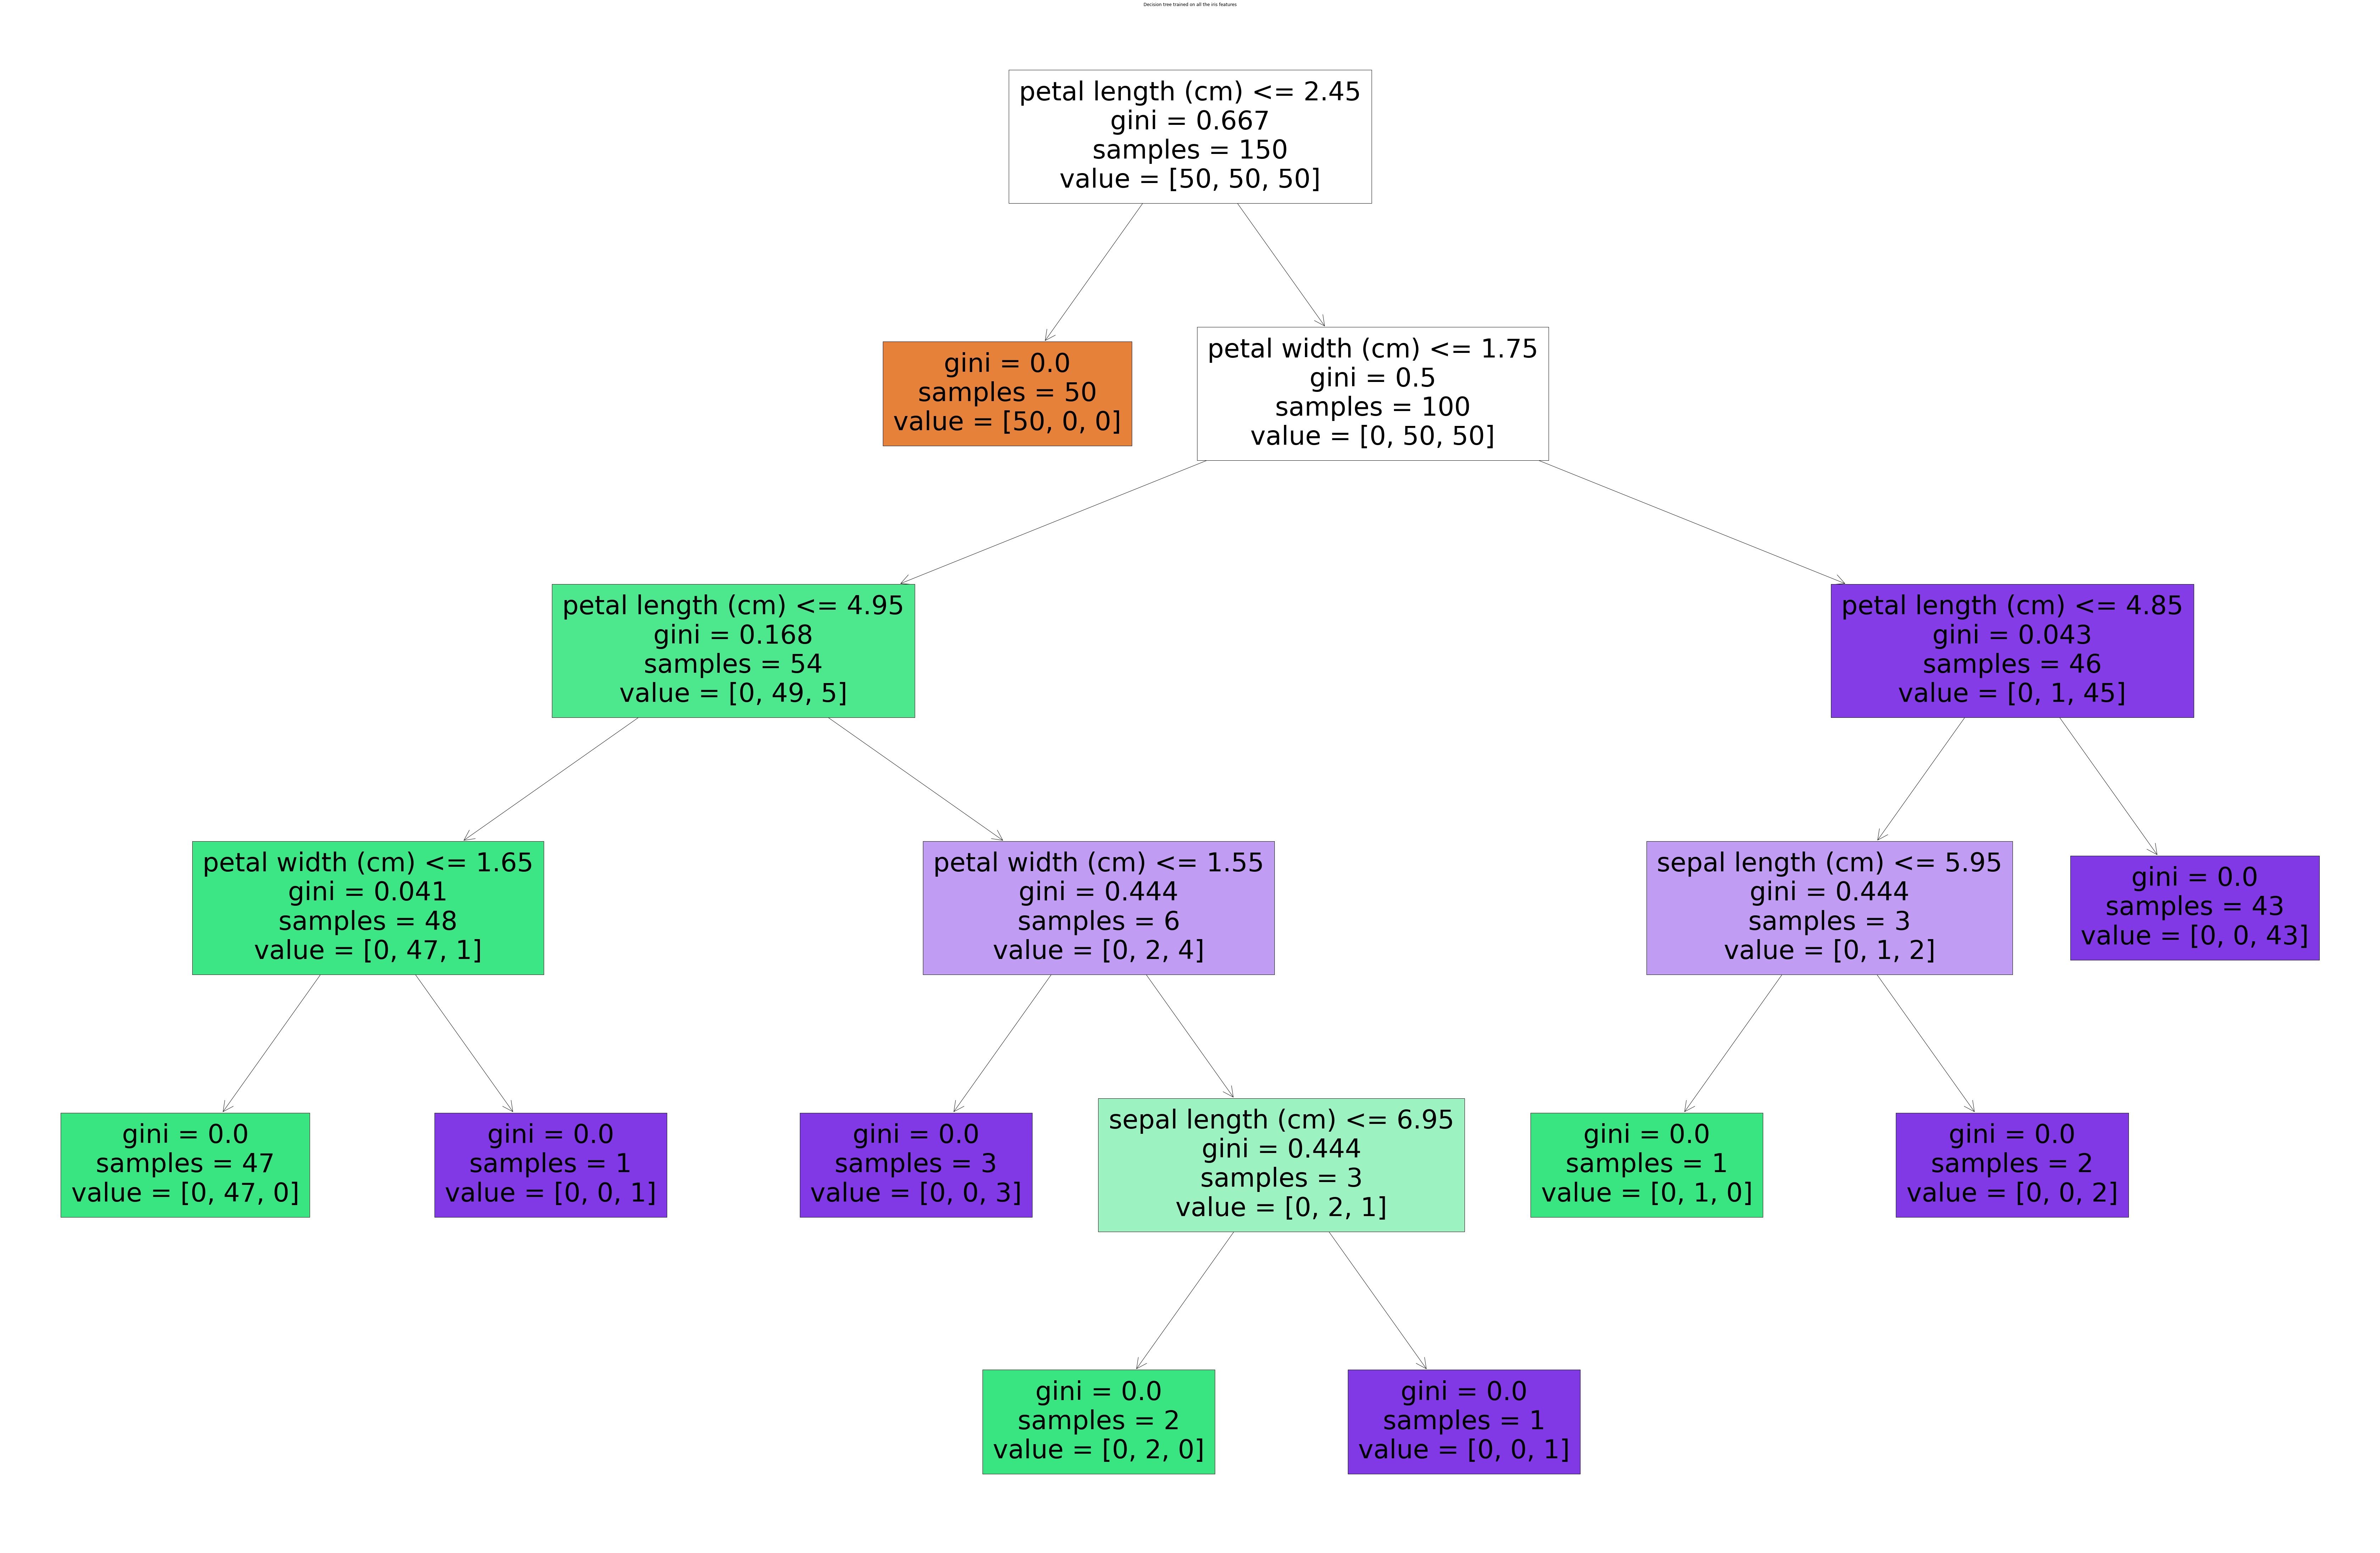

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(120, 80))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True, feature_names=iris.feature_names)
plt.title("Decision tree trained on all the iris features")
plt.show()

In [ ]:
from sklearn.tree import export_text

print(export_text(clf, feature_names=iris['feature_names']))

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



## Příklad

Příklad z https://www.w3schools.com/python/python_ml_decision_tree.asp

### Data a jejich příprava

In [ ]:
data = [
{'age': 36, 'experience': 10, 'rank': 9, 'nationality': 'UK', 'go': False},
{'age': 42, 'experience': 12, 'rank': 4, 'nationality': 'USA', 'go': False},
{'age': 23, 'experience': 4, 'rank': 6, 'nationality': 'N', 'go': False},
{'age': 52, 'experience': 4, 'rank': 4, 'nationality': 'USA', 'go': False},
{'age': 43, 'experience': 21, 'rank': 8, 'nationality': 'USA', 'go': True},
{'age': 44, 'experience': 14, 'rank': 5, 'nationality': 'UK', 'go': False},
{'age': 66, 'experience': 3, 'rank': 7, 'nationality': 'N', 'go': True},
{'age': 35, 'experience': 14, 'rank': 9, 'nationality': 'UK', 'go': True},
{'age': 52, 'experience': 13, 'rank': 7, 'nationality': 'N', 'go': True},
{'age': 35, 'experience': 5, 'rank': 9, 'nationality': 'N', 'go': True},
{'age': 24, 'experience': 3, 'rank': 5, 'nationality': 'USA', 'go': False},
{'age': 18, 'experience': 3, 'rank': 7, 'nationality': 'UK', 'go': True},
{'age': 45, 'experience': 9, 'rank': 9, 'nationality': 'UK', 'go': True},
]

showTable(data)

,age,experience,rank,nationality,go
0,36,10,9,UK,False
1,42,12,4,USA,False
2,23,4,6,N,False
3,52,4,4,USA,False
4,43,21,8,USA,True
5,44,14,5,UK,False
6,66,3,7,N,True
7,35,14,9,UK,True
8,52,13,7,N,True
9,35,5,9,N,True


> **Příklad**
> 
> Určete seznam možných hodnot v položce `nationality`

**Řešení**

In [ ]:
def checkNationalities(data):
    result = {}
    for item in data:
        result[item['nationality']] = True
    return result

print(checkNationalities(data))
print(list(checkNationalities(data).keys()))

{'UK': True, 'USA': True, 'N': True}
['UK', 'USA', 'N']


> **Příklad**
>
> Automaticky přiřaďte zjištěným položkám číselné hodnoty

**Řešení**

In [ ]:
{key: index for index, key in enumerate(checkNationalities(data).keys())}

{'UK': 0, 'USA': 1, 'N': 2}

> **Příklad**
>
> Napište funkci nahrazující textovou hodnotu číselným kódem

**Řešení**

In [ ]:
def fromNatToValue(item):
    d = {'UK': 0, 'USA': 1, 'N': 2}
    return {**item, 'nationality': d[item['nationality']]}

newData = [fromNatToValue(item) for item in data]
showTable(newData)

,age,experience,rank,nationality,go
0,36,10,9,0,False
1,42,12,4,1,False
2,23,4,6,2,False
3,52,4,4,1,False
4,43,21,8,1,True
5,44,14,5,0,False
6,66,3,7,2,True
7,35,14,9,0,True
8,52,13,7,2,True
9,35,5,9,2,True


**Řešení II**

In [ ]:
def createReplacer(attributeName, **datas):
    def transform(item):
        return {**item, attributeName: datas[item[attributeName]]}
    return transform
    
replaceDefinition = {key: index for index, key in enumerate(checkNationalities(data).keys())}
replacer = createReplacer('nationality', **replaceDefinition)
newData = [replacer(item) for item in data]
showTable(newData)

,age,experience,rank,nationality,go
0,36,10,9,0,False
1,42,12,4,1,False
2,23,4,6,2,False
3,52,4,4,1,False
4,43,21,8,1,True
5,44,14,5,0,False
6,66,3,7,2,True
7,35,14,9,0,True
8,52,13,7,2,True
9,35,5,9,2,True


In [ ]:
!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 4.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=e0be7482e5f6f7f0a11c6c974f52bf82af5c626898770b0db346a62f4d83e77f
  Stored in directory: /home/jovyan/.cache/pip/wheels/89/e5/de/6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


> **Příklad**
>
> Extrahujte vstupní attributy `age`, `experience`, `rank`, `nationality`

**Řešení**

In [ ]:
def createExtractor(attributeNames):
    def extractor(item):
        return [item[attributeName] for attributeName in attributeNames]
    return extractor

extractor = createExtractor(['age', 'experience', 'rank', 'nationality'])
inputData = list(map(extractor, data))
showTable(inputData)

,0,1,2,3
0,36,10,9,UK
1,42,12,4,USA
2,23,4,6,N
3,52,4,4,USA
4,43,21,8,USA
5,44,14,5,UK
6,66,3,7,N
7,35,14,9,UK
8,52,13,7,N
9,35,5,9,N


> **Příklad**
>
> Vyseparujte pomocí vytvořené funkce závislý atribut

**Řešení**

In [ ]:
outputData = list(map(createExtractor(['go']), data))
showTable(outputData)

,0
0,False
1,False
2,False
3,False
4,True
5,False
6,True
7,True
8,True
9,True


### Učení

[[36, 10, 9, 0], [42, 12, 4, 1], [23, 4, 6, 2], [52, 4, 4, 1], [43, 21, 8, 1], [44, 14, 5, 0], [66, 3, 7, 2], [35, 14, 9, 0], [52, 13, 7, 2], [35, 5, 9, 2], [24, 3, 5, 1], [18, 3, 7, 0], [45, 9, 9, 0]]
[0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1]


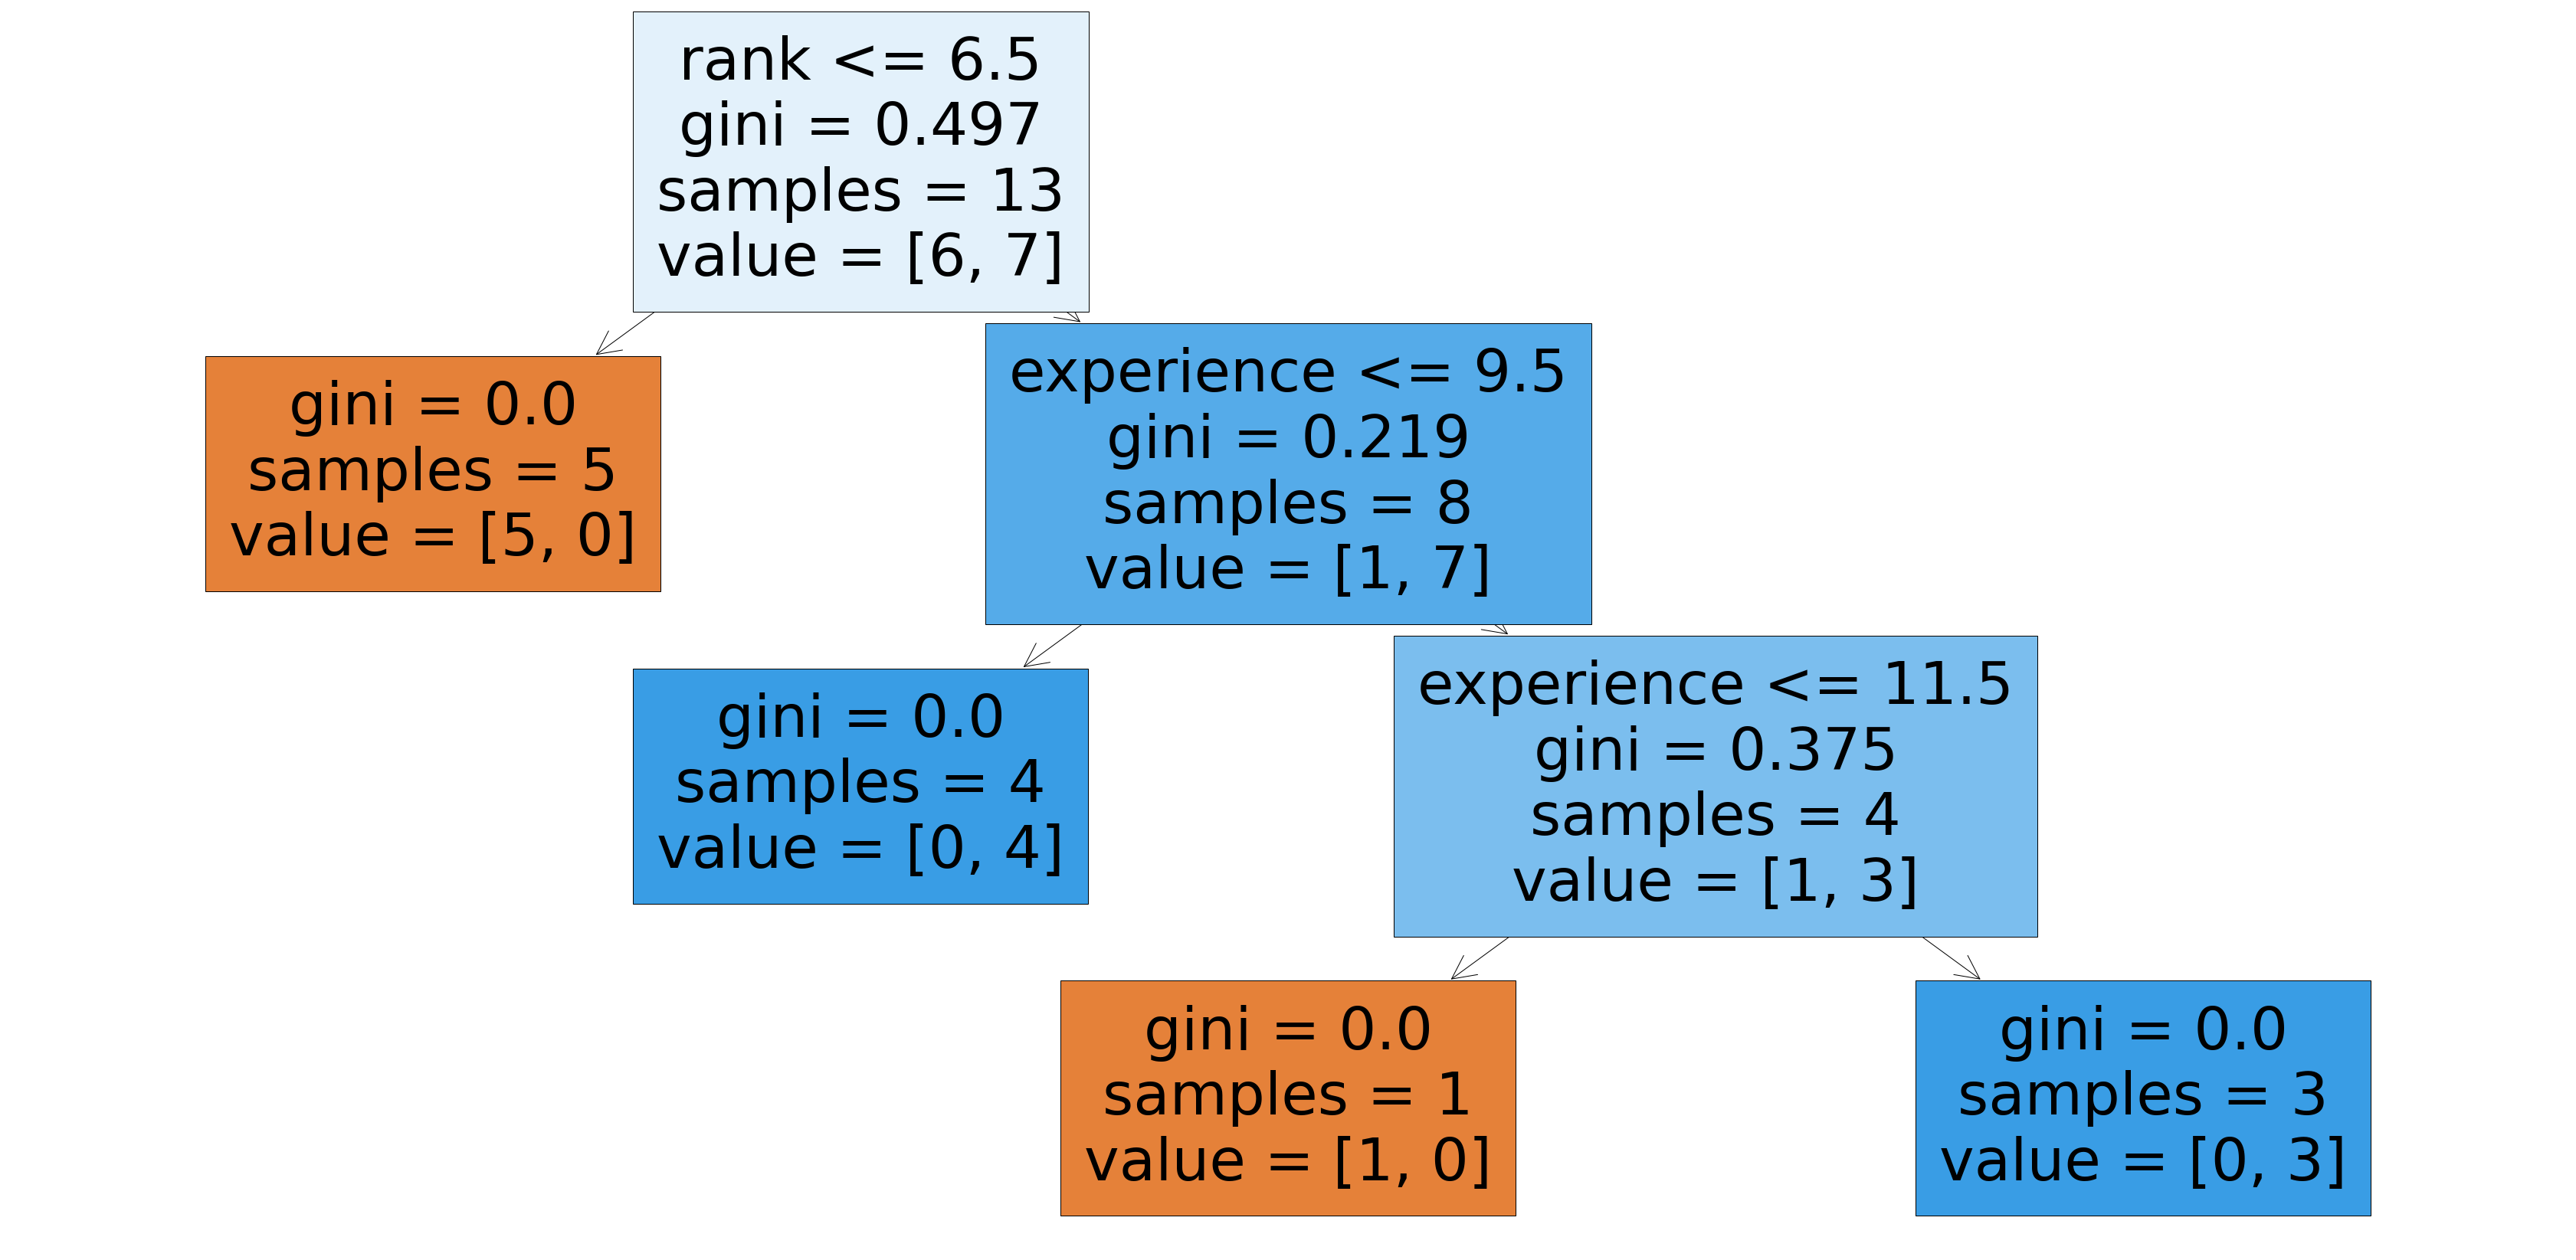

In [ ]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from IPython.display import Image

X = list(map(createExtractor(['age', 'experience', 'rank', 'nationality']), newData))
y = list(map(createExtractor(['go']), newData))
y = list(map(lambda item: 1 if item[0] else 0, y))
print(X)
print(y)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dtree, filled=True, feature_names=['age', 'experience', 'rank', 'nationality']);#, class_names=['Stay', 'Go']);

In [ ]:
from sklearn.tree import export_text

print(export_text(dtree, feature_names=['age', 'experience', 'rank', 'nationality']))

|--- rank <= 6.50
|   |--- class: 0
|--- rank >  6.50
|   |--- experience <= 9.50
|   |   |--- class: 1
|   |--- experience >  9.50
|   |   |--- experience <= 11.50
|   |   |   |--- class: 0
|   |   |--- experience >  11.50
|   |   |   |--- class: 1

